In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 24.2MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [7]:
train=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224)
)

Found 20000 files belonging to 2 classes.


In [8]:
validation=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224)
)

Found 5000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

In [10]:
train=train.map(process)

In [11]:
validation=validation.map(process)

In [23]:
model=Sequential()

In [24]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [25]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [26]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history=model.fit(train,epochs=10,validation_data=validation)

Epoch 1/10
625/625 [==============================] - 49s 72ms/step - loss: 0.6469 - accuracy: 0.6140 - val_loss: 0.5401 - val_accuracy: 0.7234
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.5052 - accuracy: 0.7516 - val_loss: 0.4743 - val_accuracy: 0.7672
Epoch 3/10
625/625 [==============================] - 46s 72ms/step - loss: 0.4227 - accuracy: 0.8030 - val_loss: 0.4468 - val_accuracy: 0.7998
Epoch 4/10
625/625 [==============================] - 50s 79ms/step - loss: 0.3317 - accuracy: 0.8532 - val_loss: 0.4603 - val_accuracy: 0.8028
Epoch 5/10
625/625 [==============================] - 46s 74ms/step - loss: 0.2269 - accuracy: 0.9046 - val_loss: 0.5865 - val_accuracy: 0.7912
Epoch 6/10
625/625 [==============================] - 47s 74ms/step - loss: 0.1448 - accuracy: 0.9450 - val_loss: 0.7566 - val_accuracy: 0.8014
Epoch 7/10
625/625 [==============================] - 45s 71ms/step - loss: 0.0881 - accuracy: 0.9686 - val_loss: 1.0058 - val_accuracy:

In [32]:
import matplotlib.pyplot as plt

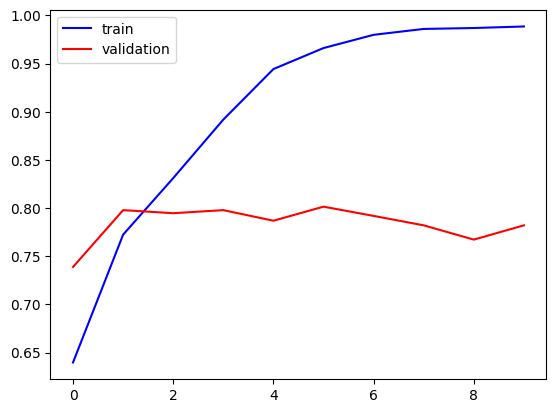

In [22]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

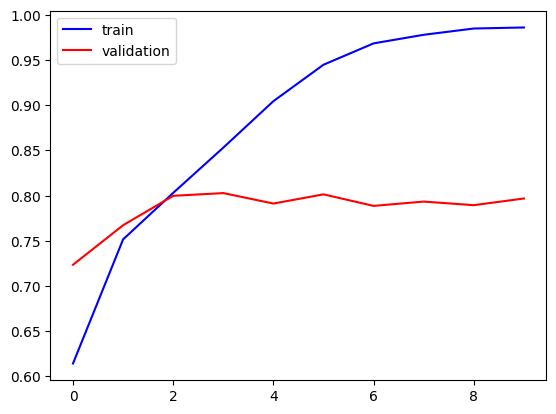

In [33]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

In [34]:
import cv2

In [35]:
test_img=cv2.imread('/content/kitty-cat-kitten-pet-45201.jpeg')

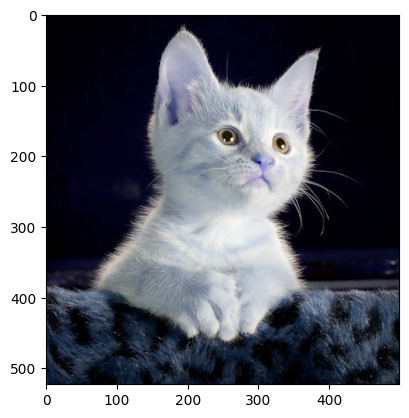

In [36]:
plt.imshow(test_img)

In [40]:
test_img=cv2.resize(test_img,(224,224))

In [41]:
test_input=test_img.reshape(1,224,224,3)

In [42]:
model.predict(test_input)

1/1 [==============================] - 0s 340ms/step


array([[0.]], dtype=float32)

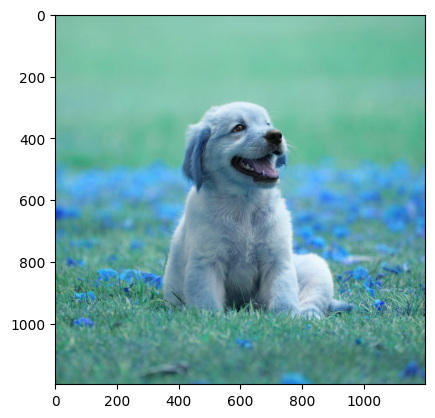

In [43]:
test_img=cv2.imread('/content/dog-puppy-on-garden-royalty-free-image-1586966191.jpg')
plt.imshow(test_img)

In [44]:
test_img=cv2.resize(test_img,(224,224))

In [45]:
test_input=test_img.reshape(1,224,224,3)

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)